# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

## Exploratory Data Analysis 

In [2]:
# Lectura datos, relación variables, mapas de correlación...

df  = pd.read_csv('./data/Advertising.csv', sep=',', index_col=0)
df.head()

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [3]:
df.tail()

,TV,radio,newpaper,sales
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0
199,232.1,8.6,8.7,13400.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    object 
 3   sales     200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


In [5]:
type(df.newpaper[0])

str

In [6]:
# convierto str en float; resulta que tengo una s perdida en un valor

df['newpaper'] = df['newpaper'].str.replace('s', '').astype(float)

# df['newpaper'] = df['newpaper'].astype(float)

In [7]:
type(df.newpaper[0])

numpy.float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    float64
 3   sales     200 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


In [9]:
df.describe()

,TV,radio,newpaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


In [10]:
# Utiliza todas las celdas que necesites...

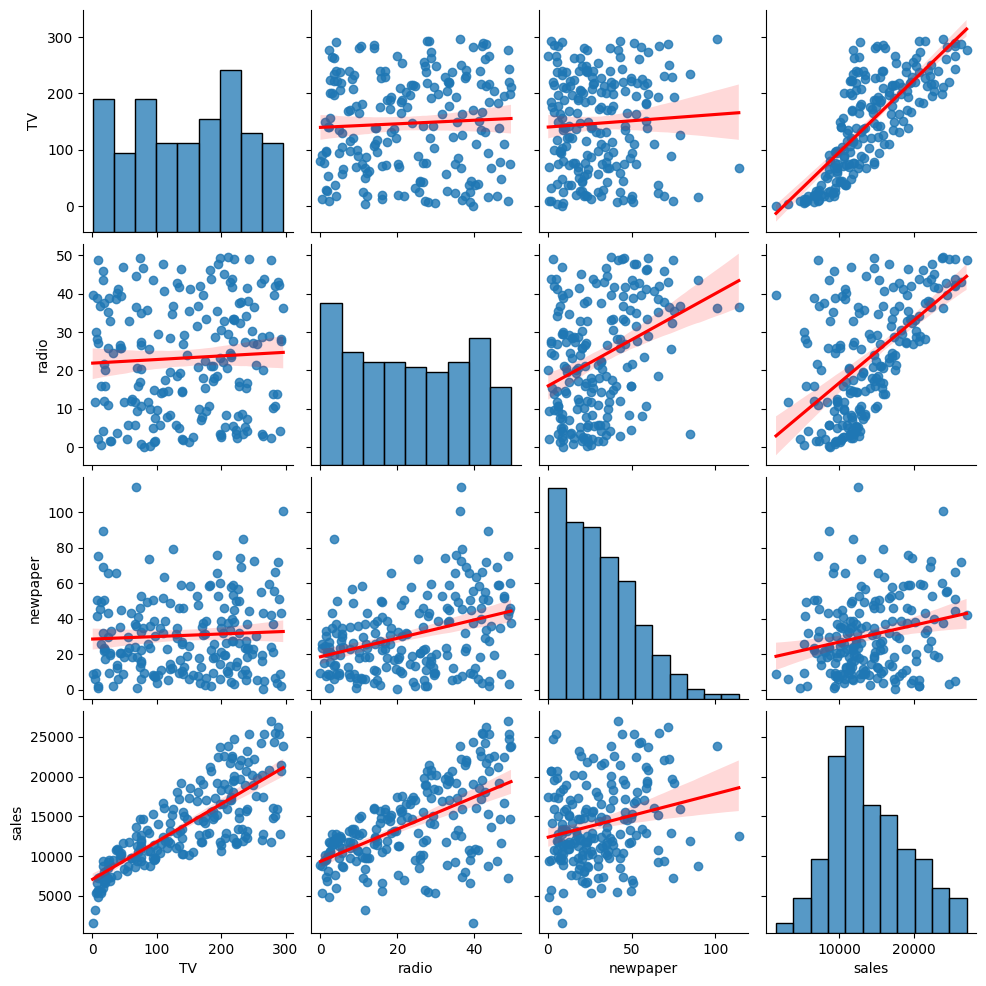

In [11]:
sns.pairplot(df, kind='reg', diag_kind='hist', plot_kws={"line_kws": {"color": "red"}});

<Axes: >

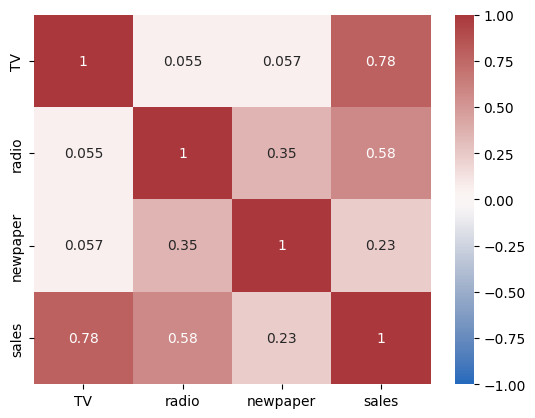

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="vlag", vmin= -1)

## Data train/splitting

In [13]:
df.head()

,TV,radio,newpaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [17]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (200, 3)
Train features shape: (160, 3)
Train target shape: (160,)
Test features shape: (40, 3)
Test target shape: (40,)


## Modelado

In [20]:
# Manipulación datasets, entrenamiento, evaluación, nuevas iteraciones... Prueba modelos sin y con regularización.

## LR sin Norm

In [22]:
lm_sin_reg = LinearRegression()

lm_sin_reg.fit(X_train, y_train)
lm_sin_reg_pred = lm_sin_reg.predict(X_test)

# baseline_error = mean_squared_error(y_test, lm_sin_reg_pred)
baseline_error = mean_squared_error(lm_sin_reg_pred, y_test)

print("Train MSE:", mean_squared_error(y_train, lm_sin_reg.predict(X_train)))
# print("Test MSE:", mean_squared_error(y_test, lm_sin_reg.predict(X_test)))
print("Test MSE:", mean_squared_error(y_test, lm_sin_reg.predict(X_test)))

Train MSE: 1858596.670949251
Test MSE: 6700486.756528875


In [23]:
print("R2 Score:", r2_score(y_test, lm_sin_reg_pred))

R2 Score: 0.8353672324670594


## LR con Norm

In [26]:
mm = MinMaxScaler()
mm.fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm

array([[0.12110845, 0.82758621, 0.04837291],
       [0.39719466, 0.39148073, 0.09938434],
       [0.4748546 , 0.58823529, 0.10817942],
       [0.13308245, 0.51926978, 0.17766051],
       [0.70715019, 1.        , 0.3289358 ],
       [0.07765994, 0.663286  , 0.16710642],
       [0.62880602, 0.34279919, 0.15479332],
       [0.78002053, 0.168357  , 0.07387863],
       [0.01094766, 0.56389452, 0.36147757],
       [0.46219637, 0.28397566, 0.22251539],
       [0.1991105 , 0.2494929 , 0.15831135],
       [0.69380773, 0.1643002 , 0.22955145],
       [1.        , 0.73022312, 0.88478452],
       [0.54533014, 0.74036511, 0.06244503],
       [0.79815258, 0.09736308, 0.20404573],
       [0.16900445, 0.03448276, 0.18557608],
       [0.93328772, 0.98580122, 0.3649956 ],
       [0.66712282, 0.61460446, 0.33773087],
       [0.44543277, 0.09330629, 0.07915567],
       [0.21484776, 0.23123732, 0.32102023],
       [0.05234348, 0.31845842, 0.19349164],
       [0.75846733, 0.16024341, 0.4942832 ],
       [0.

In [28]:
lm_mm = LinearRegression()
lm_mm.fit(X_train_mm, y_train)

X_test_mm = mm.transform(X_test)
lm_mm_pred = lm_mm.predict(X_test_mm)

baseline_error = mean_squared_error(y_test, lm_mm_pred)

print("Train MSE:", mean_squared_error(y_train, lm_mm.predict(X_train_mm)))
print("Test MSE:", mean_squared_error(y_test, lm_mm.predict(X_test_mm)))

Train MSE: 1858596.6709492512
Test MSE: 6700486.756528879


# **Con REG**


## Ridge


In [29]:

ridgeR = Ridge(alpha=10)
ridgeR.fit(X_train_mm, y_train)

print("Train MSE sin regularización:", round(mean_squared_error(y_train, lm_mm.predict(X_train_mm)),2))
print("Test MSE sin regularización:", round(mean_squared_error(y_test, lm_mm.predict(X_test_mm)),2))

print("Train MSE con regularización:", round(mean_squared_error(y_train, ridgeR.predict(X_train_mm)),2))
print("Test MSE con regularización:", round(mean_squared_error(y_test, ridgeR.predict(X_test_mm)),2))

Train MSE sin regularización: 1858596.67
Test MSE sin regularización: 6700486.76
Train MSE con regularización: 5690150.74
Test MSE con regularización: 14180909.11


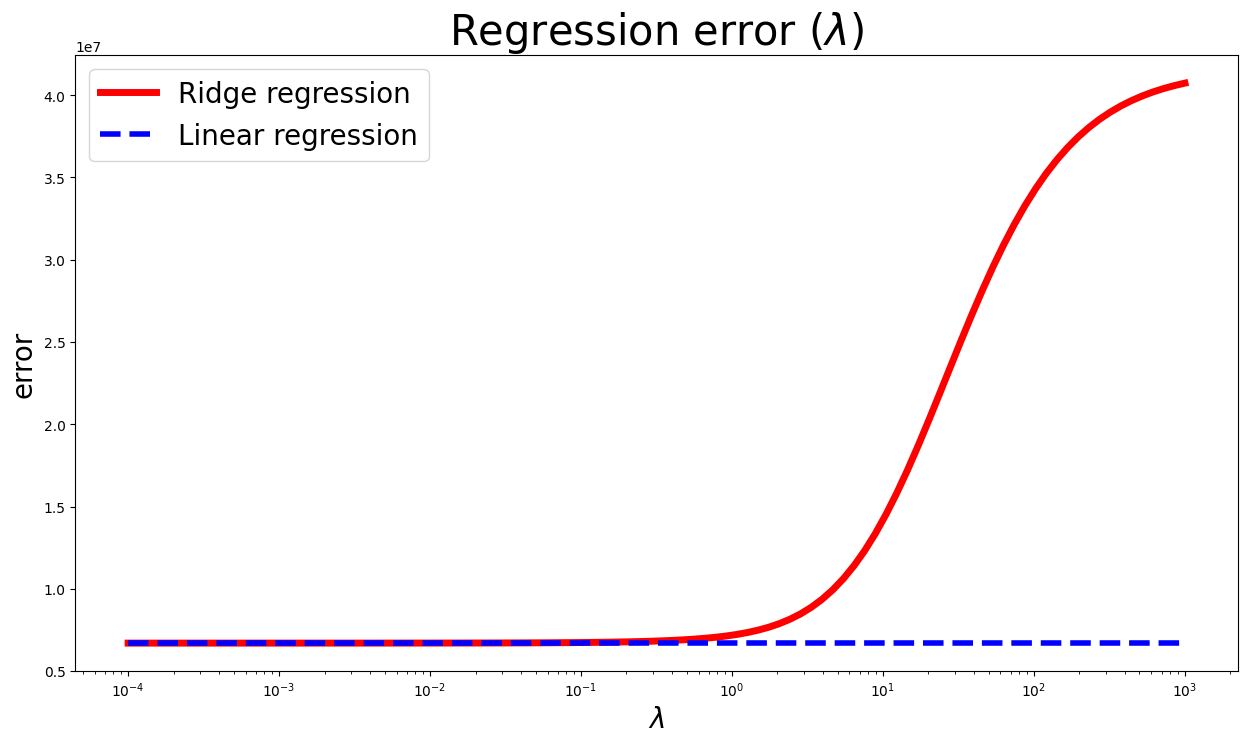

In [30]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas)

err_ridge = []
baseline = [baseline_error] * n_alphas  # baseline fijo para la gráfica

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_mm, y_train)
    y_pred = ridge.predict(X_test_mm)
    ridge_error = mean_squared_error(y_test, y_pred)
    err_ridge.append(ridge_error)

plt.figure(figsize=(15,8))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=20)
plt.ylabel('error', fontsize=20)
ax.legend(fontsize=20)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [31]:
min(err_ridge)

6700521.892083123

In [32]:
print(np.array(err_ridge).argmin())

0


In [33]:
print(alphas[np.array(err_ridge).argmin()])


0.0001


## Lasso

#### Debemos de aumentar o reducir la la complejidad de nuestros modelos?

In [ ]:
lassoR = Lasso(alpha=0.1)
lassoR.fit(X_train_mm, y_train)

print("Train MSE sin regulaz: ", round(mean_squared_error(y_train, lm_mm.predict(X_train_mm)), 2))
print("Test MSE sin regulaz: ", round(mean_squared_error(y_test, lm_mm.predict(X_test_mm)), 2))

print("Train MSE: %0.4f" % mean_squared_error(y_train, lassoR.predict(X_train_mm)))
print("Test MSE: %0.4f" % mean_squared_error(y_test, lassoR.predict(X_test_mm)))

Train MSE sin regulaz:  1858596.67
Test MSE sin regulaz:  6700486.76
Train MSE: 1858596.7108
Test MSE: 6700578.3458


In [ ]:
lasso = Lasso(fit_intercept=False)

err_lasso = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_mm, y_train)
    y_pred = lasso.predict(X_test_mm)
    lasso_error = mean_squared_error(y_test, y_pred)    
    err_lasso.append(lasso_error)

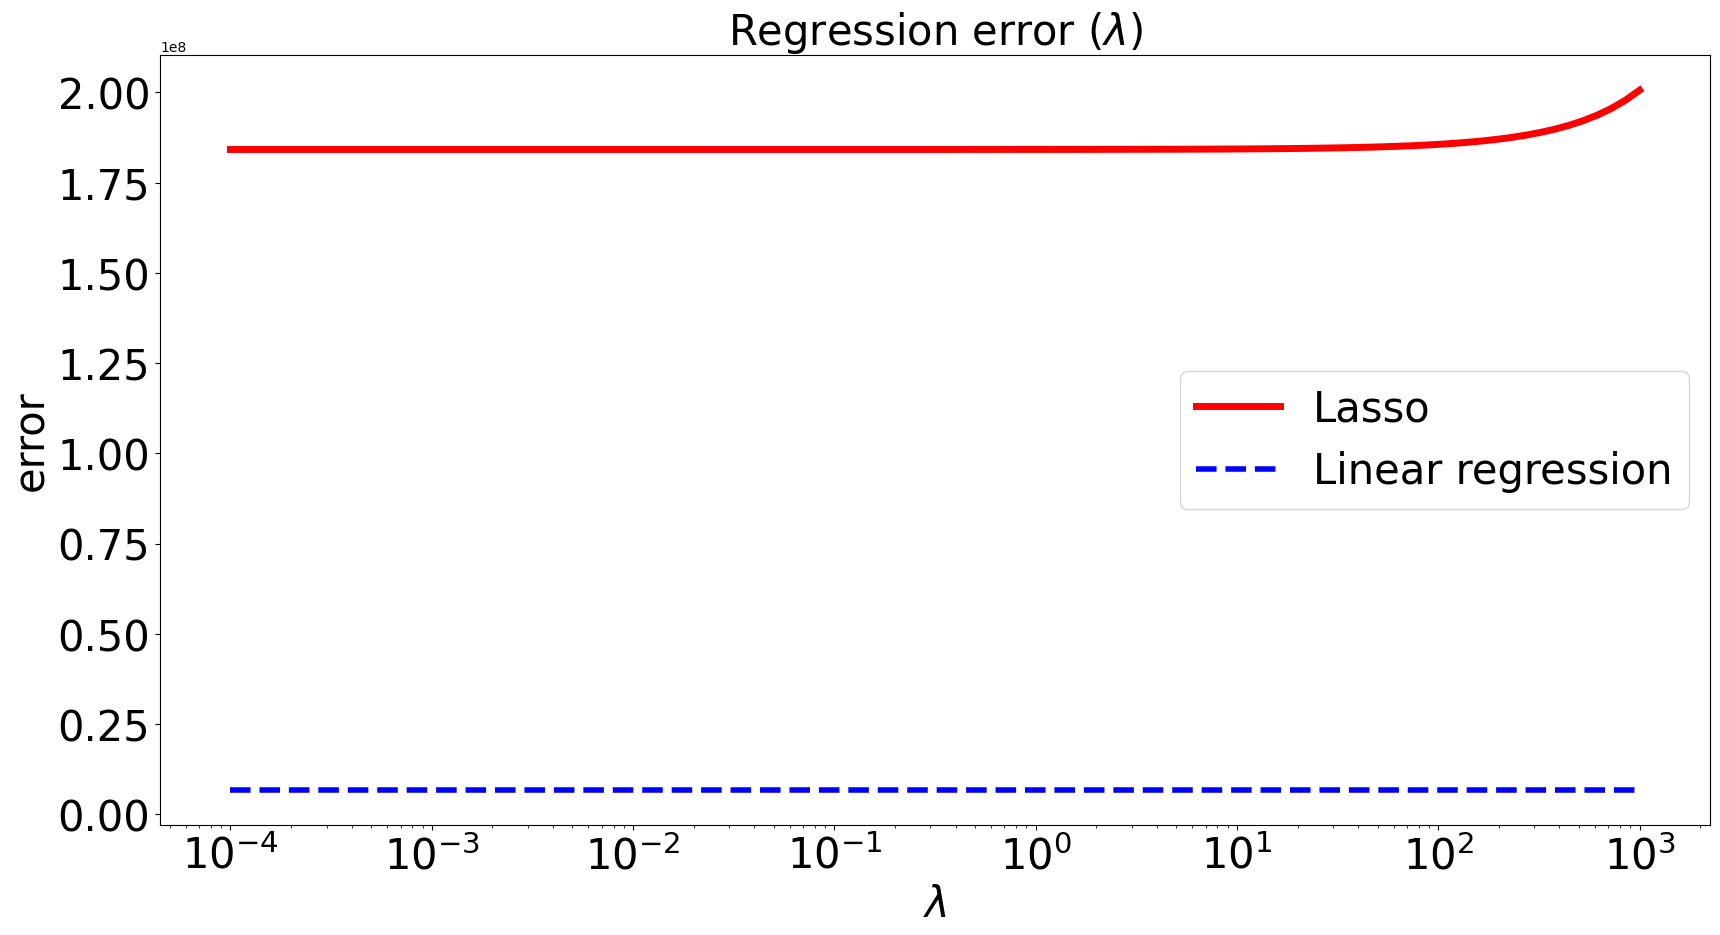

In [174]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="Lasso")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

# Menos columnas

### Data train/splitting

In [175]:
df.head()

,TV,radio,newpaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [34]:
X = df[['TV', 'radio']]
y = df.iloc[:, -1]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (200, 2)
Train features shape: (160, 2)
Train target shape: (160,)
Test features shape: (40, 2)
Test target shape: (40,)


## Modelado

In [36]:
# Manipulación datasets, entrenamiento, evaluación, nuevas iteraciones... Prueba modelos sin y con regularización.

## LR sin Norm

In [37]:
lm_sin_reg = LinearRegression()

lm_sin_reg.fit(X_train, y_train)
lm_sin_reg_pred = lm_sin_reg.predict(X_test)

baseline_error = mean_squared_error(y_test, lm_sin_reg_pred)

print("Train MSE:", mean_squared_error(y_train, lm_sin_reg.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, lm_sin_reg.predict(X_test)))

Train MSE: 1860650.8842062093
Test MSE: 6697131.733243966


## LR con Norm

In [38]:
mm = MinMaxScaler()
mm.fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm

array([[0.12110845, 0.82758621],
       [0.39719466, 0.39148073],
       [0.4748546 , 0.58823529],
       [0.13308245, 0.51926978],
       [0.70715019, 1.        ],
       [0.07765994, 0.663286  ],
       [0.62880602, 0.34279919],
       [0.78002053, 0.168357  ],
       [0.01094766, 0.56389452],
       [0.46219637, 0.28397566],
       [0.1991105 , 0.2494929 ],
       [0.69380773, 0.1643002 ],
       [1.        , 0.73022312],
       [0.54533014, 0.74036511],
       [0.79815258, 0.09736308],
       [0.16900445, 0.03448276],
       [0.93328772, 0.98580122],
       [0.66712282, 0.61460446],
       [0.44543277, 0.09330629],
       [0.21484776, 0.23123732],
       [0.05234348, 0.31845842],
       [0.75846733, 0.16024341],
       [0.54464591, 0.63488844],
       [0.69346562, 0.09939148],
       [0.55661991, 0.84584178],
       [0.79815258, 0.55172414],
       [0.78823127, 0.06288032],
       [0.25350667, 0.94320487],
       [0.46253849, 0.28803245],
       [0.09373931, 0.49290061],
       [0.

In [39]:
lm_mm = LinearRegression()
lm_mm.fit(X_train_mm, y_train)

X_test_mm = mm.transform(X_test)
lm_mm_pred = lm_mm.predict(X_test_mm)

baseline_error = mean_squared_error(y_test, lm_mm_pred)

print("Train MSE:", mean_squared_error(y_train, lm_mm.predict(X_train_mm)))
print("Test MSE:", mean_squared_error(y_test, lm_mm.predict(X_test_mm)))

Train MSE: 1860650.8842062093
Test MSE: 6697131.733243967


# **Con REG**


## Ridge


In [40]:

ridgeR = Ridge(alpha=10)
ridgeR.fit(X_train_mm, y_train)

print("Train MSE sin regularización:", round(mean_squared_error(y_train, lm_mm.predict(X_train_mm)),2))
print("Test MSE sin regularización:", round(mean_squared_error(y_test, lm_mm.predict(X_test_mm)),2))

print("Train MSE con regularización:", round(mean_squared_error(y_train, ridgeR.predict(X_train_mm)),2))
print("Test MSE con regularización:", round(mean_squared_error(y_test, ridgeR.predict(X_test_mm)),2))

Train MSE sin regularización: 1860650.88
Test MSE sin regularización: 6697131.73
Train MSE con regularización: 5720799.77
Test MSE con regularización: 14181239.97


In [41]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas)

err_ridge = []
baseline = [baseline_error] * n_alphas

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_mm, y_train)
    
    y_pred = ridge.predict(X_test_mm)
    ridge_error = mean_squared_error(y_test, y_pred)
    
    err_ridge.append(ridge_error)

In [42]:
min(err_ridge)

6697168.4548902195

In [43]:
print(np.array(err_ridge).argmin())

0


In [44]:
print(alphas[np.array(err_ridge).argmin()])


0.0001


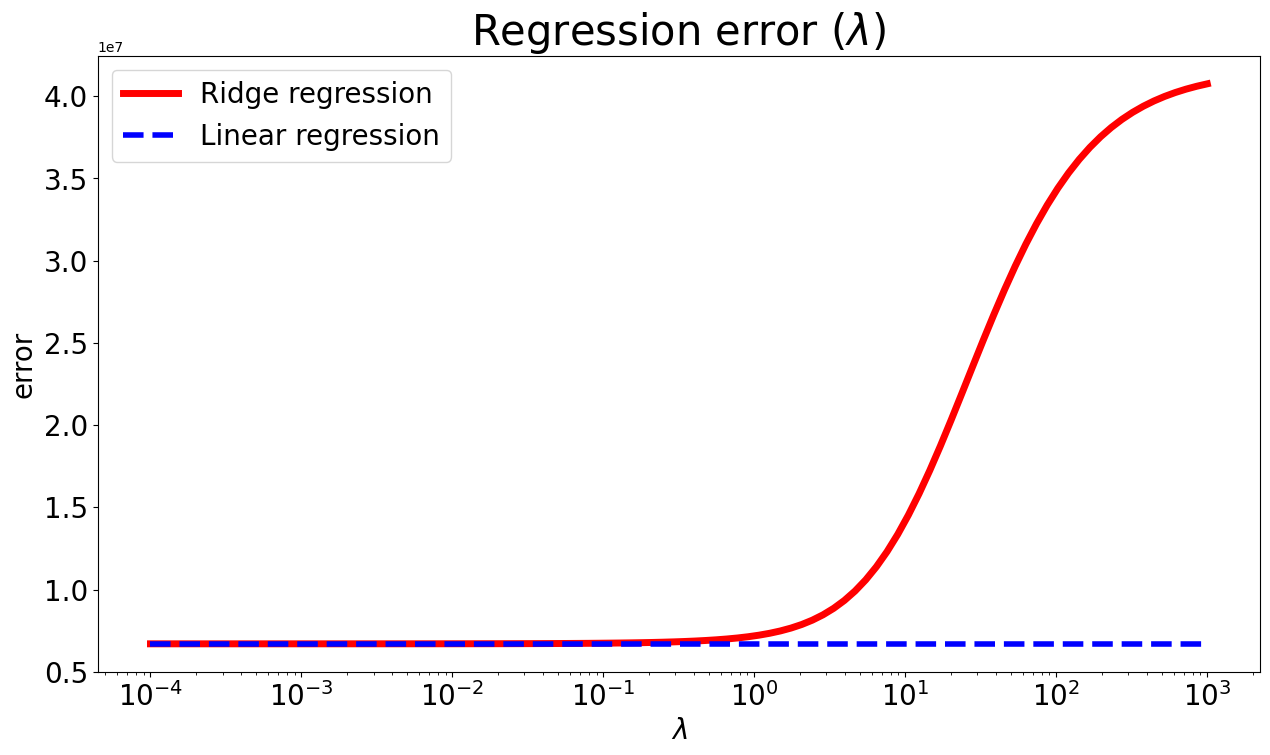

In [45]:
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('error', fontsize=20)
ax.legend(fontsize=20)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

## Lasso

#### Debemos de aumentar o reducir la la complejidad de nuestros modelos?

In [46]:
lassoR = Lasso(alpha=0.1)
lassoR.fit(X_train_mm, y_train)

print("Train MSE sin regulaz: ", round(mean_squared_error(y_train, lm_mm.predict(X_train_mm)), 2))
print("Test MSE sin regulaz: ", round(mean_squared_error(y_test, lm_mm.predict(X_test_mm)), 2))

print("Train MSE: %0.4f" % mean_squared_error(y_train, lassoR.predict(X_train_mm)))
print("Test MSE: %0.4f" % mean_squared_error(y_test, lassoR.predict(X_test_mm)))

Train MSE sin regulaz:  1860650.88
Test MSE sin regulaz:  6697131.73
Train MSE: 1860651.1151
Test MSE: 6697524.3331


In [47]:
lasso = Lasso(fit_intercept=False)

err_lasso = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_mm, y_train)
    y_pred = lasso.predict(X_test_mm)
    lasso_error = mean_squared_error(y_test, y_pred)    
    err_lasso.append(lasso_error)

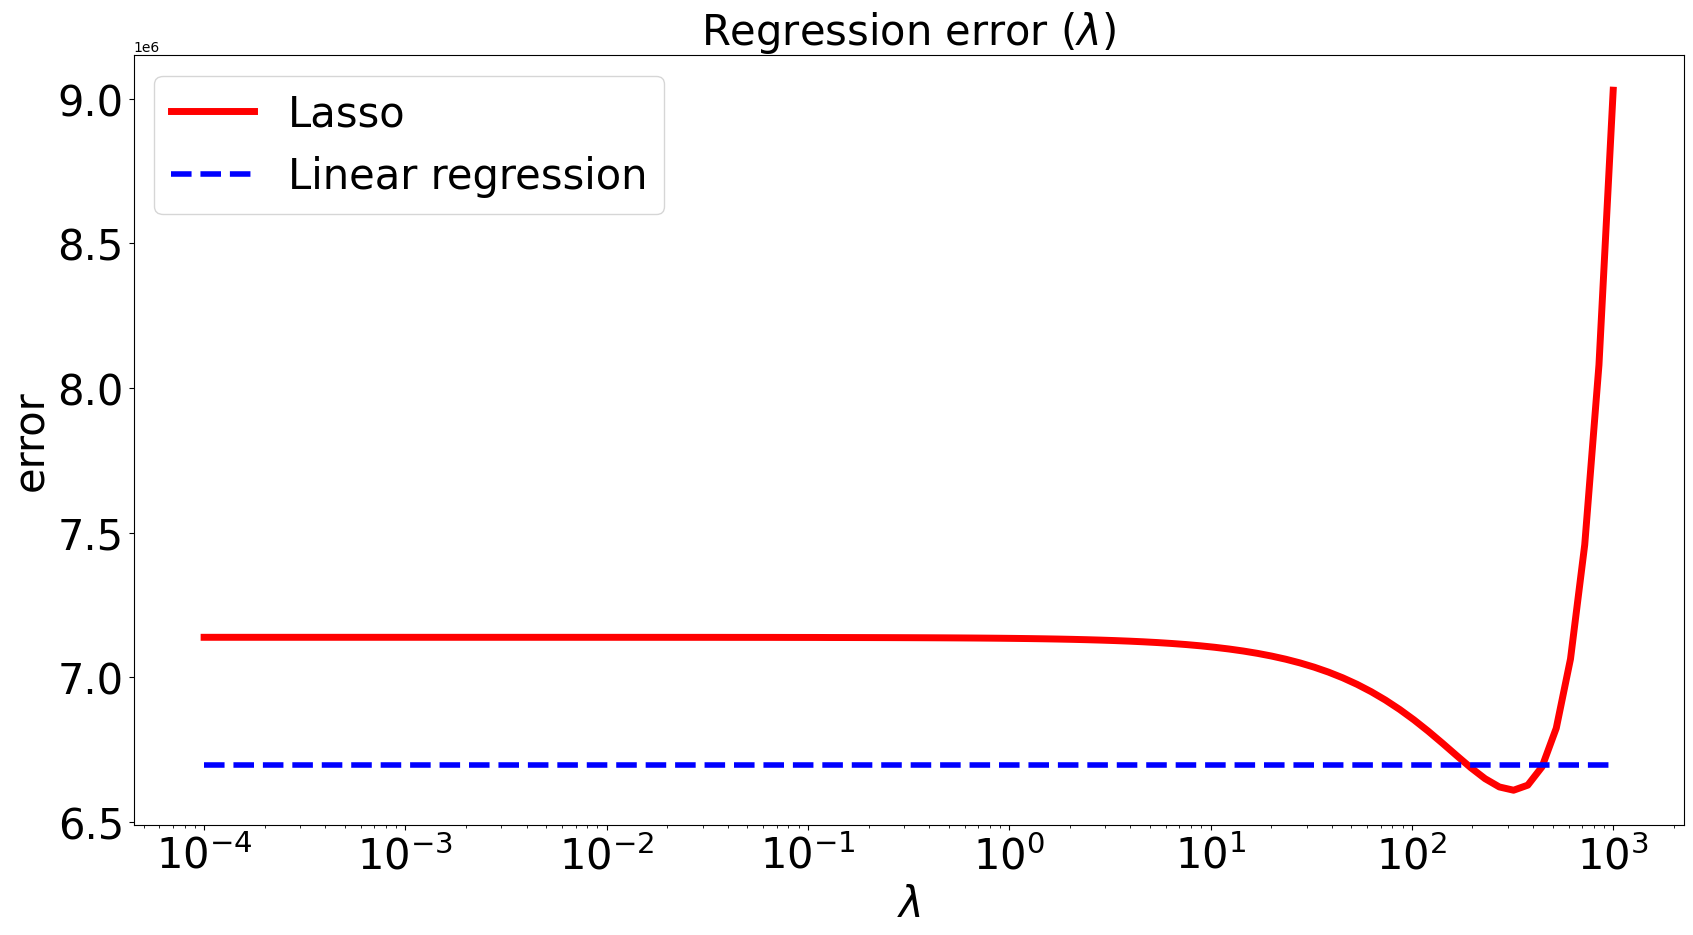

In [48]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="Lasso")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

# 1 columna

### Data train/splitting

In [49]:
df.head()

,TV,radio,newpaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [207]:
X = df[['TV']]
y = df['sales']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (200, 1)
Train features shape: (160, 1)
Train target shape: (160,)
Test features shape: (40, 1)
Test target shape: (40,)


## Modelado

In [209]:
# Manipulación datasets, entrenamiento, evaluación, nuevas iteraciones... Prueba modelos sin y con regularización.

## LR sin Norm

In [211]:
lm_sin_reg = LinearRegression()

lm_sin_reg.fit(X_train, y_train)
lm_sin_reg_pred = lm_sin_reg.predict(X_test)

baseline_error = mean_squared_error(y_test, lm_sin_reg_pred)

print("Train MSE:", mean_squared_error(y_train, lm_sin_reg.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, lm_sin_reg.predict(X_test)))

Train MSE: 9544179.610554513
Test MSE: 14537712.659299055


In [214]:
print("R2 Score:", r2_score(y_test, lm_sin_reg_pred))

R2 Score: 0.642804477396066


## LR con Norm

In [ ]:
mm = MinMaxScaler()
mm.fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm

array([[-1.29793425],
       [-0.30629937],
       [-0.02736365],
       [-1.25492655],
       [ 0.8069859 ],
       [-1.4539908 ],
       [ 0.5255926 ],
       [ 1.06871853],
       [-1.69360518],
       [-0.07282895],
       [-1.01776975],
       [ 0.75906302],
       [ 1.85883158],
       [ 0.22576743],
       [ 1.13384449],
       [-1.12590342],
       [ 1.6192172 ],
       [ 0.66321727],
       [-0.13303974],
       [-0.96124533],
       [-1.54492138],
       [ 0.99130465],
       [ 0.22330985],
       [ 0.75783423],
       [ 0.26631756],
       [ 1.13384449],
       [ 1.09820953],
       [-0.82239187],
       [-0.07160016],
       [-1.39623759],
       [-0.04702432],
       [-1.25369775],
       [-0.6257852 ],
       [-0.7302325 ],
       [-0.12198061],
       [ 0.6447854 ],
       [-0.94281346],
       [-1.56335326],
       [-0.84451012],
       [ 0.39165431],
       [-0.84451012],
       [ 1.16333549],
       [-0.58892145],
       [-1.16891113],
       [ 1.00850773],
       [ 1

In [ ]:
lm_mm = LinearRegression()
lm_mm.fit(X_train_mm, y_train)

X_test_mm = mm.transform(X_test)
lm_mm_pred = lm_mm.predict(X_test_mm)

baseline_error = mean_squared_error(y_test, lm_mm_pred)

print("Train MSE:", mean_squared_error(y_train, lm_mm.predict(X_train_mm)))
print("Test MSE:", mean_squared_error(y_test, lm_mm.predict(X_test_mm)))

Train MSE: 9544179.610554513
Test MSE: 14537712.659299055


In [ ]:
print("R2 Score:", r2_score(y_test, lm_mm_pred))

R2 Score: 0.8354496662944217


# **Con REG**


## Ridge


In [ ]:

ridgeR = Ridge(alpha=10)
ridgeR.fit(X_train_mm, y_train)

print("Train MSE sin regularización:", round(mean_squared_error(y_train, lm_mm.predict(X_train_mm)),2))
print("Test MSE sin regularización:", round(mean_squared_error(y_test, lm_mm.predict(X_test_mm)),2))

print("Train MSE con regularización:", round(mean_squared_error(y_train, ridgeR.predict(X_train_mm)),2))
print("Test MSE con regularización:", round(mean_squared_error(y_test, ridgeR.predict(X_test_mm)),2))

Train MSE sin regularización: 1860650.88
Test MSE sin regularización: 6697131.73
Train MSE con regularización: 1927503.63
Test MSE con regularización: 7047720.52


In [ ]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas)

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_mm, y_train)
    
    y_pred = ridge.predict(X_test_mm)
    ridge_error = mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

In [ ]:
min(err_ridge)

6697134.452179929

In [ ]:
print(np.array(err_ridge).argmin())

0


In [ ]:
print(alphas[np.array(err_ridge).argmin()])


0.0001


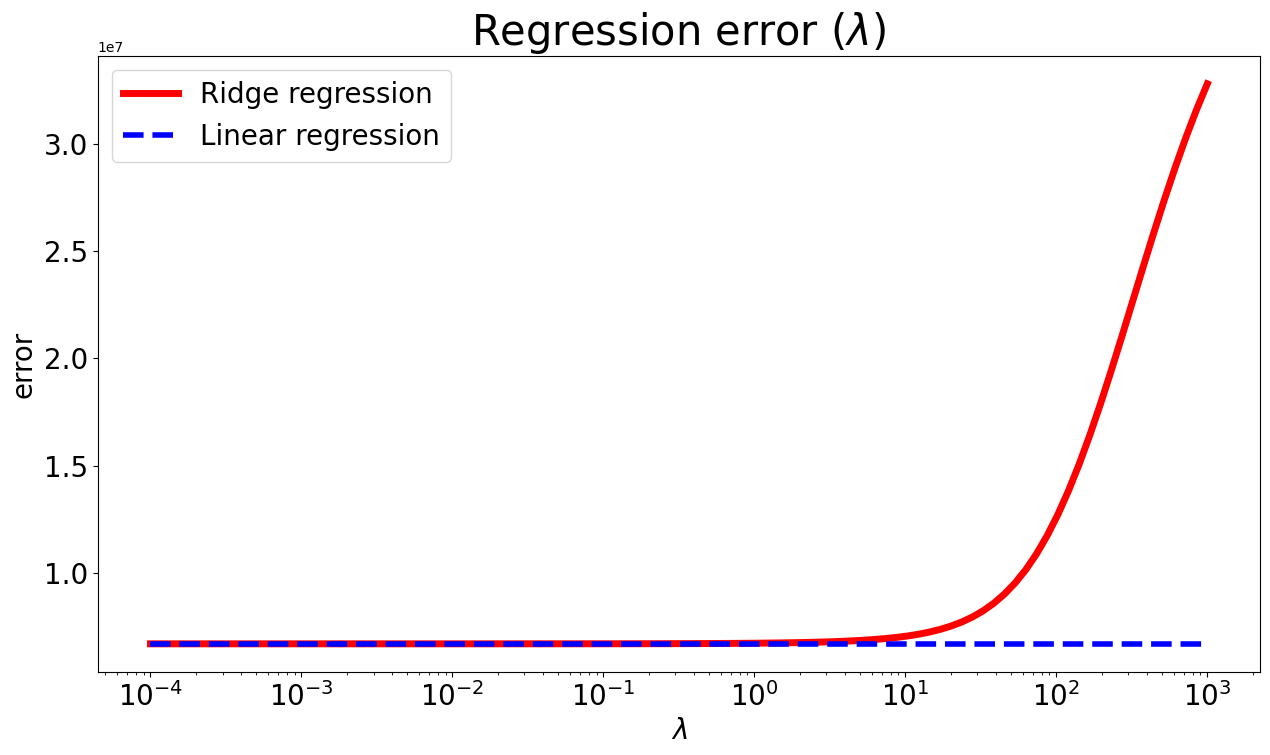

In [ ]:
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('error', fontsize=20)
ax.legend(fontsize=20)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

## Lasso

#### Debemos de aumentar o reducir la la complejidad de nuestros modelos?

In [ ]:
lassoR = Lasso(alpha=0.1)
lassoR.fit(X_train_mm, y_train)

print("Train MSE sin regulaz: ", round(mean_squared_error(y_train, lm_mm.predict(X_train_mm)), 2))
print("Test MSE sin regulaz: ", round(mean_squared_error(y_test, lm_mm.predict(X_test_mm)), 2))

print("Train MSE: %0.4f" % mean_squared_error(y_train, lassoR.predict(X_train_mm)))
print("Test MSE: %0.4f" % mean_squared_error(y_test, lassoR.predict(X_test_mm)))

Train MSE sin regulaz:  1860650.88
Test MSE sin regulaz:  6697131.73
Train MSE: 1860650.9030
Test MSE: 6697237.1969


In [ ]:
lasso = Lasso(fit_intercept=False)

err_lasso = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_mm, y_train)
    y_pred = lasso.predict(X_test_mm)
    lasso_error = mean_squared_error(y_test, y_pred)    
    err_lasso.append(lasso_error)

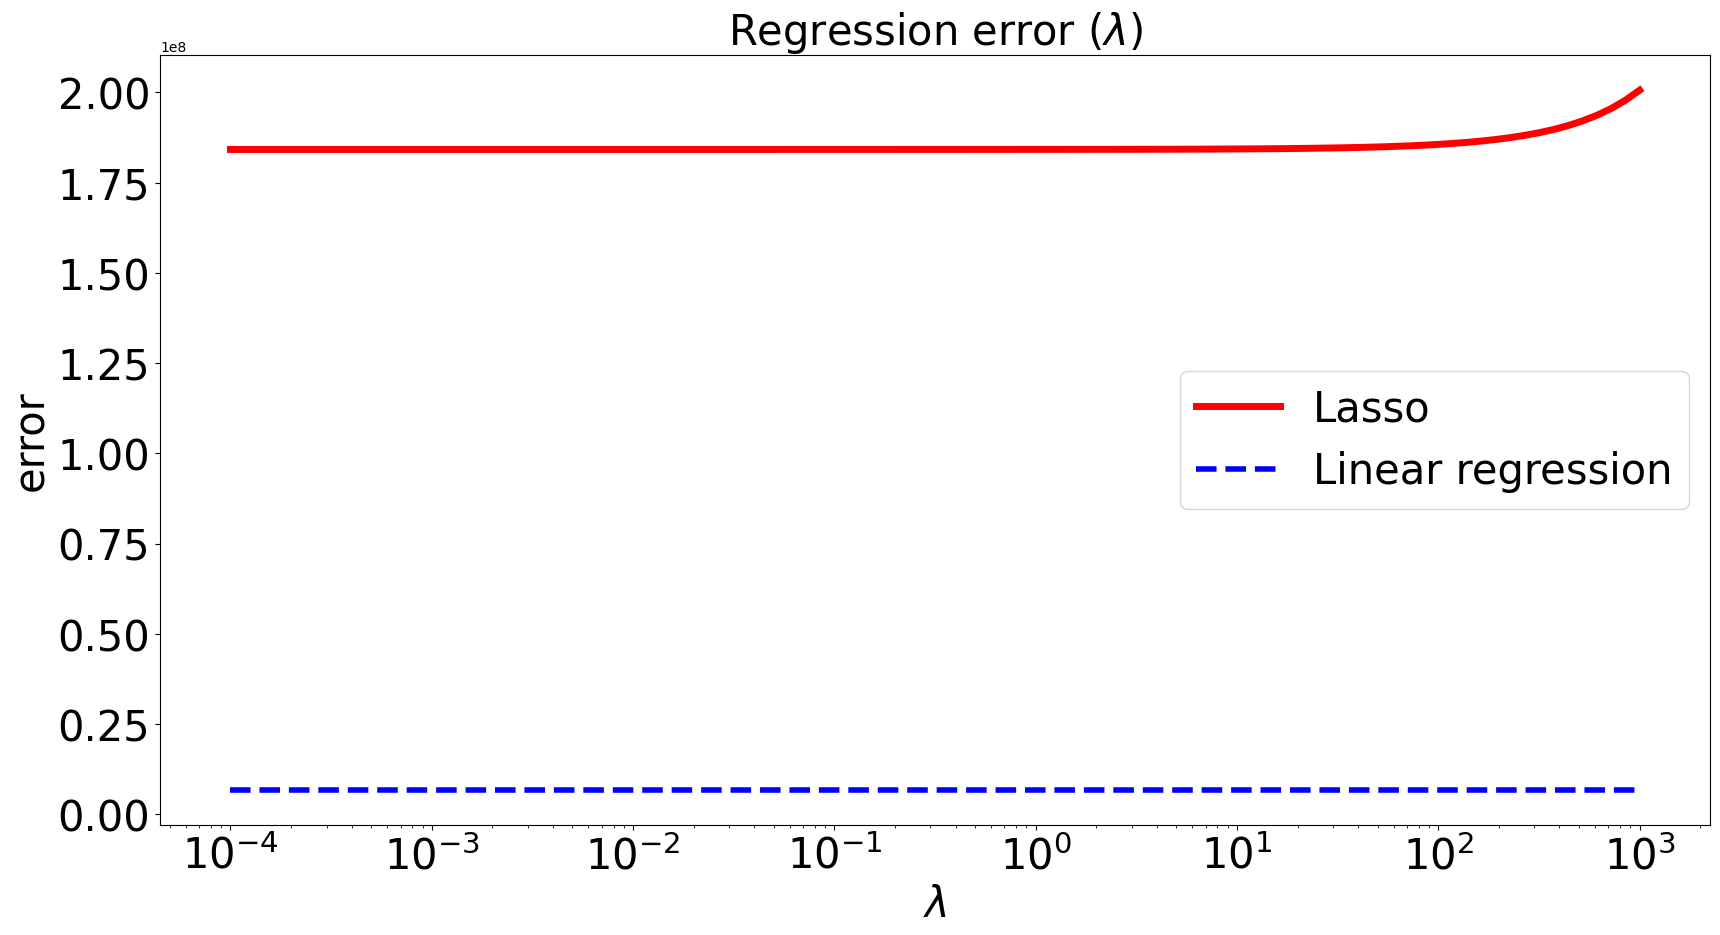

In [184]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="Lasso")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

## Resultados

In [ ]:
# Interpreta, resume y destaca los puntos importantes de los resultados.

In [ ]:
# Utiliza todas las celdas que necesites...